In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import joblib

## Load Pickled Tokenized Data

In [11]:
train_clean = joblib.load('data/train_clean.pckl')
test_clean = joblib.load('data/test_clean.pckl')

In [10]:
train_clean.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text_list,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, edits, make, username, hardcore,...",explanation edits make username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[aww, match, background, colour, seemingly, st...",aww match background colour seemingly stick th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, really, try, edit, war, guy, consta...",hey man really try edit war guy constantly rem...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[make, real, suggestion, improvement, wonder, ...",make real suggestion improvement wonder sectio...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[sir, hero, chance, remember, page]",sir hero chance remember page


## Data Transforms (e.g. Bag of Words Vectorization)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD

In [13]:
# bag of words, including bi-grams

vectorizer = CountVectorizer(ngram_range=(1,2),
                             tokenizer=None, 
                             preprocessor=None, 
                             lowercase=False)

X = vectorizer.fit_transform(train_clean['clean_text'])  
X_test = vectorizer.transform(test_clean['clean_text'])

In [93]:
# tfidf transform

tfidf_vectorizer = TfidfTransformer(sublinear_tf=True)

X_tfidf = tfidf_vectorizer.fit_transform(X)   
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [18]:
# svd dimensionality reduction

svd_transform = TruncatedSVD(n_components=100)

X_svd = svd_transform.fit_transform(X_tfidf)   
X_test_svd = svd_transform.transform(X_test_tfidf)

In [19]:
print(X.shape, X_tfidf.shape, X_svd.shape)
print(X_test.shape, X_test_tfidf.shape, X_test_svd.shape)
print(len(train_clean), len(test_clean))

(159571, 2605661) (159571, 2605661) (159571, 100)
(153164, 2605661) (153164, 2605661) (153164, 100)
159571 153164


In [2]:
# joblib.dump(X, 'data/X.pckl')
# joblib.dump(X_tfidf, 'data/X_tfidf.pckl')
# joblib.dump(X_svd, 'data/X_svd.pckl')

# joblib.dump(X_test, 'data/X_test.pckl')
# joblib.dump(X_test_tfidf, 'data/X_test_tfidf.pckl')
# joblib.dump(X_test_svd, 'data/X_test_svd.pckl')

#X = joblib.load('data/X.pckl')
X_tfidf = joblib.load('data/X_tfidf.pckl')
X_svd = joblib.load('data/X_svd.pckl')

#X_test = joblib.load('data/X_test.pckl')
X_test_tfidf = joblib.load('data/X_test_tfidf.pckl')
X_test_svd = joblib.load('data/X_test_svd.pckl')

## Most Common Words

In [89]:
v = pd.Series(vectorizer.get_feature_names())
top_counts = dict()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:

    keep_1 = np.array(1*(train_clean[target]==1))
    keep_0 = np.array(1*(train_clean[target]==0))
    
    X_temp_1 = (X.T.multiply(keep_1)).T
    X_temp_0 = (X.T.multiply(keep_0)).T
    
    s_0 = pd.Series(np.array(X_temp_0.sum(axis=0)).reshape(-1))
    s_1 = pd.Series(np.array(X_temp_1.sum(axis=0)).reshape(-1))
    
    ranks = pd.concat([v, s_0, s_1], axis=1)
    ranks.columns=['feature', 'sum_0', 'sum_1']
    
    top_counts[target+'_1'] = ranks.sort_values('sum_1', ascending=False)['feature'].head(250).reset_index()
    top_counts[target+'_0'] = ranks.sort_values('sum_0', ascending=False)['feature'].head(250).reset_index()
    
#     print("-----------------------------------------")
#     print("Most Common Features : ",target.upper())
#     print("-----------------------------------------")
#     print(ranks['feature'].head(30))
#     print()

In [90]:
pd.concat(top_counts,axis=1)

identity_hate_0               identity_hate_1                 insult_0  \
              index       feature           index         feature    index   
0            229588       article         1561303          nigger   229588   
1           1656030          page         1561428   nigger nigger  1656030   
2           2526588     wikipedia         1235178             jew  2526588   
3           2259259          talk          885138             fat  2259259   
4           2423062           use         1235461         jew fat  2423062   
5           1616848           one          885253         fat jew  1616848   
6           1395580          make          957015            fuck  1737910   
7           1737910        please          975657             gay  1395580   
8           2561662         would          683407             die  2561662   
9            753449          edit          871049          faggot   753449   
10          1334187          like          683668         die die  1334187   
11          2041695           see         2220053            suck  2041695   
12          2012202           say         1113708            huge  2012202   
13          2306795         think         1113862     huge faggot  2306795   
14          1274108          know          871155     faggot huge  2145138   
15          2145138        source         2079069            shit  1274108   
16           987298           get         1334187            like   162191   
17          1001908            go          609521            cunt   987298   
18           162191          also         2210346          stupid   111027   
19           111027           add         1461436         mexican  1001908   
20          2325712          time          337257           bitch  2325712   
21          1693911        people          240401              as  1693911   
22          2430320          user         1001908              go  2430320   
23          1009870          good         1461568    mexican suck  1009870   
24          1540433          need         2220359    suck mexican  1428397   
25           342946         block          957974     fuck niggas  1540433   
26          1428397           may         1561288          niggas  2262696   
27          2262696     talk page         1561290     niggas fuck   342946   
28          2255646          take          987298             get  1346639   
29          2481459          want         1057091            hate  1135527   
..              ...           ...             ...             ...      ...   
220         1575078       notable         2569469           write  1123882   
221         2588097           yes         1550552           never   797713   
222          817285           etc          907264            find   294732   
223          797713        enough         2519398           whore  2457039   
224          624945          date          111027             add  1613023   
225          599600     criterion          287567             ban  2577336   
226          294732          base         1432849          mccain   478491   
227          119343         admin         1004046       go mccain  1330735   
228         2457039       version         1174564     information   787549   
229          225260        around          387485         bush go   833649   
230         2577336           www         1002491         go bush   225260   
231          478491         clear         1873661            real  2590037   
232         2590037           yet          865973            fact  2342857   
233          787549  encyclopedia         2431716  user enigmaman  1942087   
234          833649      evidence          796631  enigmaman homo  1849262   
235         1873661          real         1499463          mother   846697   
236          789069           end          796630       enigmaman  1442546   
237         1942087      research         1379321         love d3   789069   
238         2342857       

In [96]:
top_tfidf = dict()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:

    keep_1 = np.array(1*(train_clean[target]==1))
    keep_0 = np.array(1*(train_clean[target]==0))
    
    X_temp_1 = (X_tfidf.T.multiply(keep_1)).T
    X_temp_0 = (X_tfidf.T.multiply(keep_0)).T
    
    s_0 = pd.Series(np.array(X_temp_0.sum(axis=0)).reshape(-1))
    s_1 = pd.Series(np.array(X_temp_1.sum(axis=0)).reshape(-1))
    
    ranks = pd.concat([v, s_0, s_1], axis=1)
    ranks.columns=['feature', 'sum_0', 'sum_1']
    
    top_tfidf[target+'_1'] = ranks.sort_values('sum_1', ascending=False)['feature'].head(250).reset_index()
    top_tfidf[target+'_0'] = ranks.sort_values('sum_0', ascending=False)['feature'].head(250).reset_index()
    
    print("-----------------------------------------")
    print("TFIDF Most Common Features : ",target.upper())
    print("-----------------------------------------")
    print(ranks.sort_values('sum_1', ascending=False)['feature'].head(30))
    print()

-----------------------------------------
TFIDF Most Common Features :  TOXIC
-----------------------------------------
957015          fuck
2079069         shit
2220053         suck
1001908           go
987298           get
337257         bitch
1334187         like
959016       fucking
2210346       stupid
240401            as
248474       asshole
2526588    wikipedia
2195577         stop
1128077        idiot
1656030         page
681572          dick
975657           gay
871049        faggot
342946         block
609521          cunt
1274108         know
1693911       people
1330735         life
1067377         hell
1395580         make
1003365      go fuck
2012202          say
2306795        think
2481459         want
753449          edit
Name: feature, dtype: object

-----------------------------------------
TFIDF Most Common Features :  SEVERE_TOXIC
-----------------------------------------
957015             fuck
337257            bitch
2220053            suck
959016          fucki

In [97]:
pd.concat(top_tfidf,axis=1)

identity_hate_0                  identity_hate_1                insult_0  \
              index          feature           index        feature    index   
0            229588          article          957015           fuck   229588   
1           1656030             page          975657            gay  1656030   
2           2259259             talk         1561303         nigger  2259259   
3           2526588        wikipedia          871049         faggot  2526588   
4           1737910           please         2079069           shit  1737910   
5            753449             edit          337257          bitch   753449   
6           1395580             make         1235178            jew  1395580   
7           1334187             like          959016        fucking  2423062   
8           2423062              use          240401             as  2561662   
9           2561662            would         1001908             go  1334187   
10          1616848              one         1334187           like  1616848   
11          2041695              see         2220053           suck  2041695   
12          2306795            think         1098540     homosexual  2306795   
13          1274108             know         1561199          nigga  2294143   
14          2294143           thanks          987298            get  1274108   
15          2012202              say          870809            fag  2012202   
16           987298              get         1536156           nazi   342946   
17           342946            block          609521           cunt   111027   
18           111027              add         2210346         stupid  2145138   
19          1001908               go         1098169           homo   987298   
20          2145138           source         1057091           hate  1001908   
21          1009870             good          681572           dick  1009870   
22          2430320             user         1853326         racist  2430320   
23          2262696        talk page         1003365        go fuck  2262696   
24           162191             also         1693911         people   162191   
25          2325712             time         1076582            hey  2325712   
26          1924962           remove         2195577           stop  1924962   
27          1540433             need          885138            fat  1540433   
28          1370789             look         1357008         little  1370789   
29          2481459             want          489732           cock  2292382   
..              ...              ...             ...            ...      ...   
220         1310453            least         1499621  mother fucker   624945   
221         2260409    talk contribs         1517902           must   335607   
222          465660             cite          884092        fascist  1422745   
223          335607              bit         1003556        go hell  1722276   
224         1722276          picture          905724         filthy  1034468   
225          287567              ban         2366661           true   771191   
226         1932331            reply          975829        gay fag   927158   
227          225260           around          738142           dude  2457039   
228          624945             date          512985      communist   478491   
229          771191           either         2115709          slave  2499825   
230         1422745         material         2430443       user abd   225260   
231         2499825          website         2108121           site  1567721   
232         2487639          warning          835558           evil  1309353   
233          927158           follow         1357182   little bitch  2183088   
234         1873661             real         2493683            way  1330735   
235          828811             ever         1060050           head   918385   
236         1309353            learn          458635      christian   189574   
237 

## Generic sklearn Imports

In [7]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.interpolate import interp1d

## Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB

In [10]:
mbayes = MultinomialNB()
mbayes.fit(X, train_clean['toxic'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
mbayes_pred = mbayes.predict_proba(X)

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(train_clean['toxic'], mbayes_pred[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

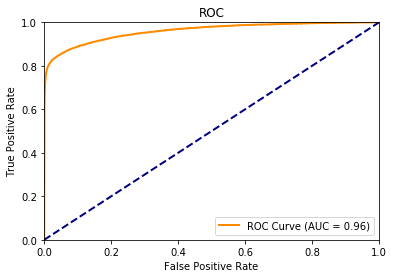

In [31]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [51]:
# cross validation AUC

cv_results = dict()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    cv_results[target] = cross_val_score(mbayes, X, train_clean[target], cv=StratifiedKFold(5), scoring='roc_auc')
    print(target, 
          " "*(20-len(target)), 
          "  :  ", 
          round(np.mean(cv_results[target]), 4), 
          "  ", 
          round(np.std(cv_results[target]), 6))

toxic                   :   0.8601    0.003205
severe_toxic            :   0.8644    0.004199
obscene                 :   0.862    0.006637
threat                  :   0.7499    0.031864
insult                  :   0.8497    0.006109
identity_hate           :   0.779    0.014738


In [55]:
# cross validation AUC

cv_results_tfidf = dict()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    cv_results_tfidf[target] = cross_val_score(mbayes, X_tfidf, train_clean[target], cv=StratifiedKFold(5), scoring='roc_auc')
    print(target, 
          " "*(20-len(target)), 
          "  :  ", 
          round(np.mean(cv_results_tfidf[target]), 4), 
          "  ", 
          round(np.std(cv_results_tfidf[target]), 6))

toxic                   :   0.8454    0.002871
severe_toxic            :   0.8547    0.007475
obscene                 :   0.8537    0.005573
threat                  :   0.7538    0.030615
insult                  :   0.8419    0.004978
identity_hate           :   0.785    0.010499


In [78]:
# CV estimated kaggle score (mean of auc across targets)
np.mean([np.mean(cv_results_tfidf[key]) for key in cv_results_tfidf])

0.82241290693755087

## Create Baseline NB Scores for Submission

In [70]:
scores_baseline = test_clean[['id']].copy()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    mbayes.fit(X_tfidf, train_clean[target])
    scores_baseline[target] = mbayes.predict_proba(X_test_tfidf)[:,1]

In [74]:
scores_baseline.to_csv('data/S1_baselineNB.csv', index=False)

In [65]:
sample = pd.read_csv('data/sample_submission.csv')
sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [72]:
len(sample), len(scores_baseline)

(153164, 153164)

## Regularized Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

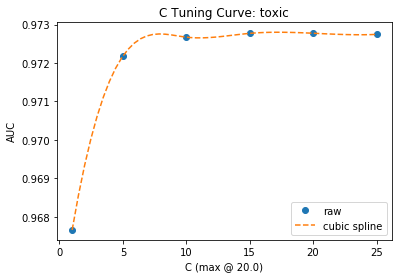

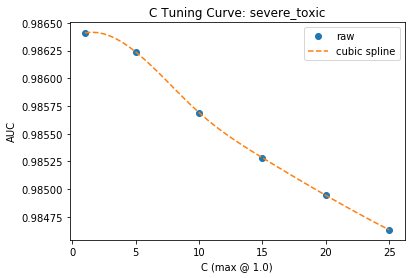

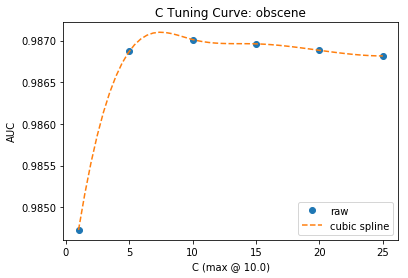

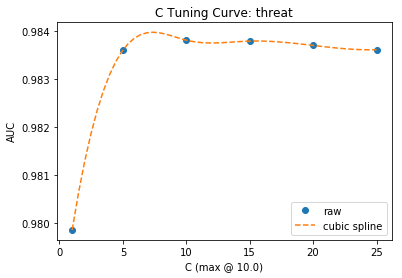

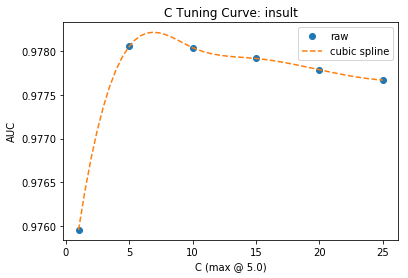

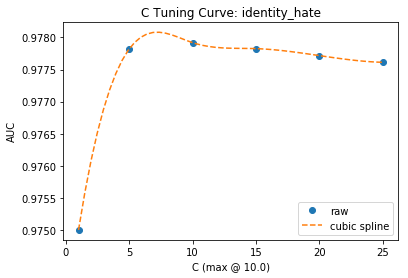

In [34]:
# tune 'C' regularization param via cross validation AUC

tune_results = dict()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    
    log = LogisticRegression(C=1.0, 
                         class_weight=None, 
                         dual=False, 
                         fit_intercept=True,
                         intercept_scaling=1, 
                         max_iter=100, 
                         multi_class='ovr', 
                         n_jobs=1, 
                         penalty='l2', 
                         random_state=None, 
                         solver='liblinear', 
                         tol=0.0001,
                         verbose=0, 
                         warm_start=False)

    params = {'C':[1,5,10,15,20,25]}

    estimator = GridSearchCV(log, 
                            params,
                            scoring='roc_auc',
                            n_jobs=3,
                            cv=StratifiedKFold(5))

    estimator.fit(X_tfidf, train_clean[target])

    x = np.ma.getdata(estimator.cv_results_['param_C']).astype(np.float)
    y = estimator.cv_results_['mean_test_score']
    f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(min(x), max(x), num=50, endpoint=True)
    plt.plot(x, y, 'o', xnew, f2(xnew), '--')
    plt.legend(['raw',  'cubic spline'], loc='best')
    plt.title('C Tuning Curve: '+target)
    plt.axis('tight')
    plt.xlabel('C (max @ %0.1f)' % x[np.argmax(y)])
    plt.ylabel('AUC')
    plt.show()
    
    tune_results[target] = list(zip(x,y))

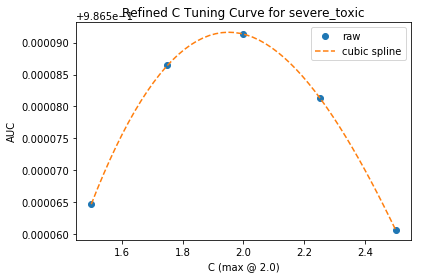

In [38]:
# get more accurate C for severe_toxic

log = LogisticRegression(C=1.0, 
                         class_weight=None, 
                         dual=False, 
                         fit_intercept=True,
                         intercept_scaling=1, 
                         max_iter=100, 
                         multi_class='ovr', 
                         n_jobs=1, 
                         penalty='l2', 
                         random_state=None, 
                         solver='liblinear', 
                         tol=0.0001,
                         verbose=0, 
                         warm_start=False)

params = {'C':[1.5, 1.75, 2, 2.25, 2.5]}

estimator = GridSearchCV(log, 
                        params,
                        scoring='roc_auc',
                        n_jobs=3,
                        cv=StratifiedKFold(5))

estimator.fit(X_tfidf, train_clean['severe_toxic'])

x = np.ma.getdata(estimator.cv_results_['param_C']).astype(np.float)
y = estimator.cv_results_['mean_test_score']
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(min(x), max(x), num=50, endpoint=True)
plt.plot(x, y, 'o', xnew, f2(xnew), '--')
plt.legend(['raw',  'cubic spline'], loc='best')
plt.title('Refined C Tuning Curve for severe_toxic')
plt.axis('tight')
plt.xlabel('C (max @ %0.1f)' % x[np.argmax(y)])
plt.ylabel('AUC')
plt.show()

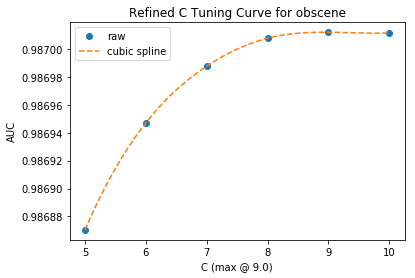

In [39]:
# get more accurate C for obscene

log = LogisticRegression(C=1.0, 
                         class_weight=None, 
                         dual=False, 
                         fit_intercept=True,
                         intercept_scaling=1, 
                         max_iter=100, 
                         multi_class='ovr', 
                         n_jobs=1, 
                         penalty='l2', 
                         random_state=None, 
                         solver='liblinear', 
                         tol=0.0001,
                         verbose=0, 
                         warm_start=False)

params = {'C':[5,6,7,8,9,10]}

estimator = GridSearchCV(log, 
                        params,
                        scoring='roc_auc',
                        n_jobs=3,
                        cv=StratifiedKFold(5))

estimator.fit(X_tfidf, train_clean['obscene'])

x = np.ma.getdata(estimator.cv_results_['param_C']).astype(np.float)
y = estimator.cv_results_['mean_test_score']
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(min(x), max(x), num=50, endpoint=True)
plt.plot(x, y, 'o', xnew, f2(xnew), '--')
plt.legend(['raw',  'cubic spline'], loc='best')
plt.title('Refined C Tuning Curve for obscene')
plt.axis('tight')
plt.xlabel('C (max @ %0.1f)' % x[np.argmax(y)])
plt.ylabel('AUC')
plt.show()

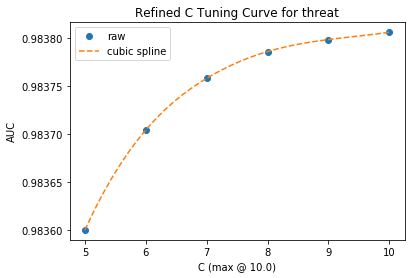

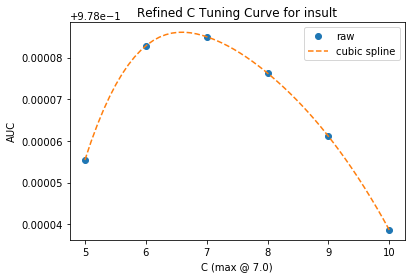

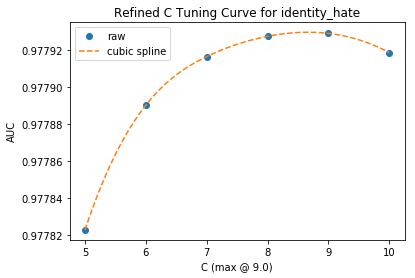

In [41]:
for target in ['threat','insult','identity_hate']:
    
    log = LogisticRegression(C=1.0, 
                         class_weight=None, 
                         dual=False, 
                         fit_intercept=True,
                         intercept_scaling=1, 
                         max_iter=100, 
                         multi_class='ovr', 
                         n_jobs=1, 
                         penalty='l2', 
                         random_state=None, 
                         solver='liblinear', 
                         tol=0.0001,
                         verbose=0, 
                         warm_start=False)

    params = {'C':[5,6,7,8,9,10]}

    estimator = GridSearchCV(log, 
                            params,
                            scoring='roc_auc',
                            n_jobs=3,
                            cv=StratifiedKFold(5))

    estimator.fit(X_tfidf, train_clean[target])

    x = np.ma.getdata(estimator.cv_results_['param_C']).astype(np.float)
    y = estimator.cv_results_['mean_test_score']
    f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(min(x), max(x), num=50, endpoint=True)
    plt.plot(x, y, 'o', xnew, f2(xnew), '--')
    plt.legend(['raw',  'cubic spline'], loc='best')
    plt.title('Refined C Tuning Curve for '+target)
    plt.axis('tight')
    plt.xlabel('C (max @ %0.1f)' % x[np.argmax(y)])
    plt.ylabel('AUC')
    plt.show()

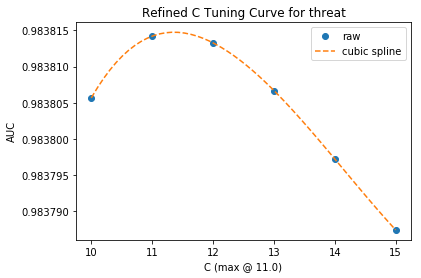

In [42]:
log = LogisticRegression(C=1.0, 
                     class_weight=None, 
                     dual=False, 
                     fit_intercept=True,
                     intercept_scaling=1, 
                     max_iter=100, 
                     multi_class='ovr', 
                     n_jobs=1, 
                     penalty='l2', 
                     random_state=None, 
                     solver='liblinear', 
                     tol=0.0001,
                     verbose=0, 
                     warm_start=False)

params = {'C':[10,11,12,13,14,15]}

estimator = GridSearchCV(log, 
                        params,
                        scoring='roc_auc',
                        n_jobs=3,
                        cv=StratifiedKFold(5))

estimator.fit(X_tfidf, train_clean['threat'])

x = np.ma.getdata(estimator.cv_results_['param_C']).astype(np.float)
y = estimator.cv_results_['mean_test_score']
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(min(x), max(x), num=50, endpoint=True)
plt.plot(x, y, 'o', xnew, f2(xnew), '--')
plt.legend(['raw',  'cubic spline'], loc='best')
plt.title('Refined C Tuning Curve for threat')
plt.axis('tight')
plt.xlabel('C (max @ %0.1f)' % x[np.argmax(y)])
plt.ylabel('AUC')
plt.show()

In [133]:
scores_log = test_clean[['id']].copy()

log = LogisticRegression(C=10)

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    log.fit(X_tfidf, train_clean[target])
    scores_log[target] = log.predict_proba(X_test_tfidf)[:,1]
    
scores_log.to_csv('data/S2_logistic.csv', index=False)

scores_log.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999989,0.307416,0.999961,0.054181,0.997736,0.524813
1,0000247867823ef7,0.002596,0.001469,0.001865,0.000892,0.003447,0.001414
2,00013b17ad220c46,0.013625,0.001629,0.005241,0.000546,0.005957,0.001321
3,00017563c3f7919a,0.001194,0.000817,0.000995,0.000414,0.001075,0.000346
4,00017695ad8997eb,0.015218,0.001245,0.003587,0.000438,0.006009,0.000764


Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


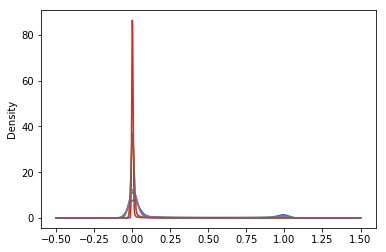

In [139]:
for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
        print(scores_log[target].plot.density())

In [43]:
# refined logistic with individually tuned C regularization parameters

final_c = {'toxic':20,'severe_toxic':2,'obscene':9,'threat':11,'insult':7,'identity_hate':9}

scores_log_tuned = test_clean[['id']].copy()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    log = LogisticRegression(C=final_c[target]).fit(X_tfidf, train_clean[target])
    scores_log_tuned[target] = log.predict_proba(X_test_tfidf)[:,1]
    
scores_log_tuned.to_csv('data/S4_logistic_tuned.csv', index=False)

scores_log_tuned.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999998,0.281835,0.999947,0.061473,0.996868,0.543055
1,0000247867823ef7,0.001353,0.003861,0.002057,0.000824,0.004617,0.001561
2,00013b17ad220c46,0.007018,0.003792,0.005141,0.000504,0.006714,0.001295
3,00017563c3f7919a,0.000760,0.002394,0.001351,0.000469,0.001634,0.000453
4,00017695ad8997eb,0.008361,0.002503,0.003442,0.000390,0.006880,0.000801


## LDA w/ SVD Decomp

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

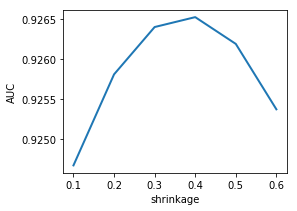

In [33]:
lda = LinearDiscriminantAnalysis(n_components=None, 
                                 priors=None, 
                                 shrinkage=None,
                                 solver='eigen', 
                                 store_covariance=False, 
                                 tol=0.0001)

params = {'shrinkage':[.1,.2,.3,.4,.5,.6]}

estimator = GridSearchCV(lda, 
                        params,
                        scoring='roc_auc',
                        n_jobs=1,
                        cv=StratifiedKFold(5))

estimator.fit(X_svd, train_clean['toxic'])

plt.figure(1, figsize=(4, 3))
plt.plot(np.ma.getdata(estimator.cv_results_['param_shrinkage']), estimator.cv_results_['mean_test_score'], linewidth=2)
plt.axis('tight')
plt.xlabel('shrinkage')
plt.ylabel('AUC')
plt.show()

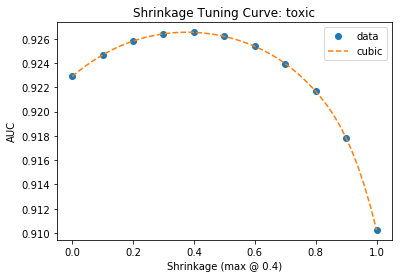

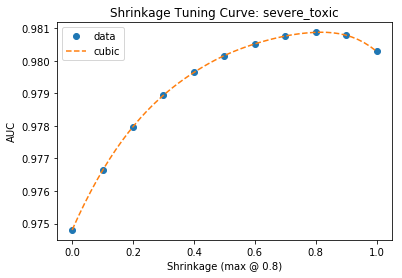

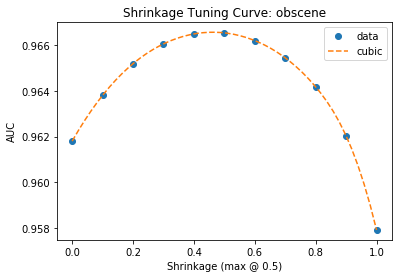

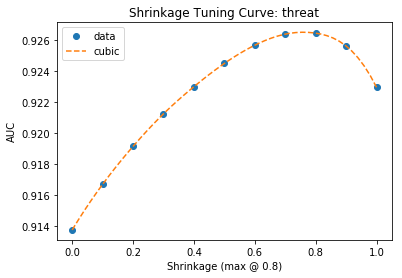

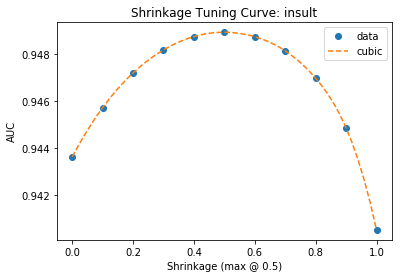

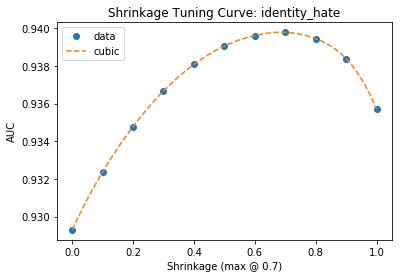

In [88]:
scores_lda = test_clean[['id']].copy()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:

    lda = LinearDiscriminantAnalysis(n_components=None, 
                                 priors=None, 
                                 shrinkage=None,
                                 solver='eigen', 
                                 store_covariance=False, 
                                 tol=0.0001)

    params = {'shrinkage':[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}

    estimator = GridSearchCV(lda, 
                            params,
                            scoring='roc_auc',
                            n_jobs=1,
                            cv=StratifiedKFold(5))
    
    estimator.fit(X_svd, train_clean[target])

    x = np.ma.getdata(estimator.cv_results_['param_shrinkage']).astype(np.float)
    y = estimator.cv_results_['mean_test_score']
    f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(min(x), max(x), num=50, endpoint=True)
    plt.plot(x, y, 'o', xnew, f2(xnew), '--')
    plt.legend(['data',  'cubic'], loc='best')
    plt.title('Shrinkage Tuning Curve: '+target)
    plt.axis('tight')
    plt.xlabel('Shrinkage (max @ %0.1f)' % x[np.argmax(y)])
    plt.ylabel('AUC')
    plt.show()

    lda = LinearDiscriminantAnalysis(shrinkage=x[np.argmax(y)], solver='eigen').fit(X_svd, train_clean[target])
    scores_lda[target] = lda.predict_proba(X_test_svd)[:,1]
    
#scores_lda.to_csv('data/S3_lda_svd.csv', index=False)

## KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [ ]:
knn.fit(X_tfidf, train_clean['toxic'])

In [107]:
skf = StratifiedKFold(n_splits=10, random_state=678246569, shuffle=True)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10,
                          metric = 'cosine',
                          algorithm='brute',
                          n_jobs=3)

#knn_train_scores = train_clean[['id']].copy()
#knn_test_scores = test_clean[['id']].copy()

for target in ['toxic']:  #,'severe_toxic','obscene','threat','insult','identity_hate']:

    #knn_train_scores[target] = np.nan
    #knn_test_scores[target] = np.nan
    
    # train and score cv models for stacking
    for train, test in skf.split(X_tfidf, train_clean[target]):
        knn.fit(X_tfidf[train, :], train_clean.loc[train, target])
        #sgd_train_scores.loc[test, target] = sgd.predict_proba(X_tfidf[test, :])[:,1]

    # train full model and score on test data
    #sgd.fit(X_tfidf, train_clean[target])
    #sgd_test_scores[target] = sgd.predict_proba(X_test_tfidf)[:,1]
    
        scores = knn.predict_proba(X_tfidf[test, :])[:,1]
        
        fpr, tpr, thresholds = roc_curve(train_clean.loc[test, target], scores, pos_label=1)
        roc_auc = auc(fpr, tpr)
        
        print(round(roc_auc, 4),' - ',target.upper())

## Score Correlation

In [44]:
s1 = pd.read_csv('data/S1_baselineNB.csv')
s2 = pd.read_csv('data/S2_logistic.csv')
s3 = pd.read_csv('data/S3_lda_svd.csv')
s4 = pd.read_csv('data/S4_logistic_tuned.csv')

In [71]:
from itertools import combinations

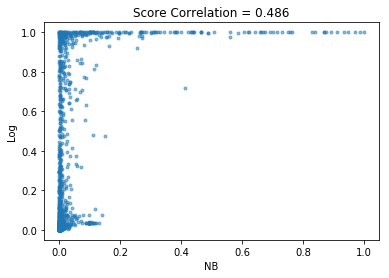

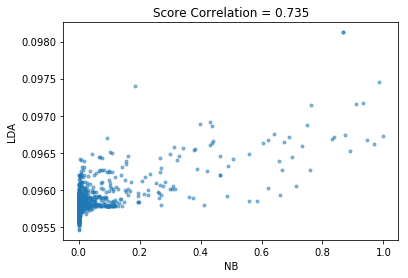

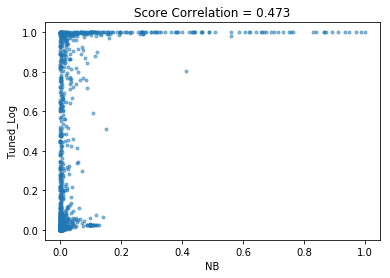

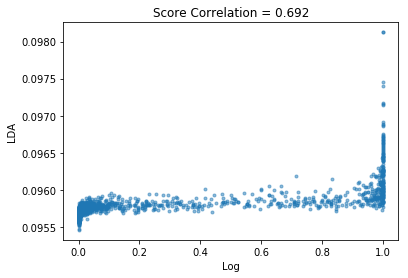

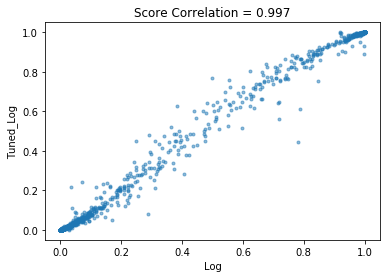

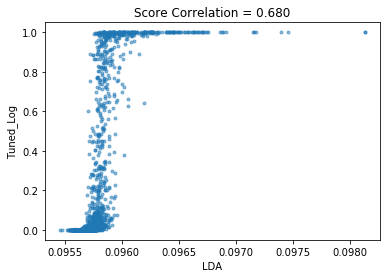

In [87]:
sampsize = 2000

temp = pd.concat([s1[target],s2[target],s3[target],s4[target]], axis=1).sample(sampsize, axis=0)
temp.columns=['NB','Log','LDA','Tuned_Log']

for comb in combinations(temp.columns, 2):
    corr = np.corrcoef(temp[comb[0]], temp[comb[1]])

    plt.plot(temp[comb[0]], temp[comb[1]], '.', alpha=.5)
    plt.title('Score Correlation = %0.3f' % corr[0,1])
    plt.axis('tight')
    plt.xlabel(comb[0])
    plt.ylabel(comb[1])
    plt.show()